<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Seattle_weather_Assignment_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment ML3
Use the same project from the previous assignment (the heuristic modeling) and build a function that takes a vector of predictions using your heuristic and a vector of realizations (the correct values) from the data set and calculate:

- Precision
- Recall  
- SSE Cost of your prediction

SSE is the sum of squared error (adding up the difference in your prediction and the actual value after you have squared each individual difference), you can find more about how to calculate it here.

1. Break the dataset into two parts, training and testing.
2. Use the first 80% of the dataset for training and the last 20% for testing.
3. Evaluate both sets of data using your function.
4. What difference do you see in the calculated values (Precision and Recall)?
5. Submit your notebook.

### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

### My heuristic model
**if it rained yesterday but not today, it will rain tomorrow.** 




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

#sort columns for convience
seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
heuristic_df.head()

,yesterday,today,tomorrow,guess,rain_tomorrow,correct
0,0.0,0.0,0.0,False,False,False
1,0.0,0.0,0.0,False,False,False
2,0.0,0.0,0.0,False,False,False
3,0.0,0.0,0.0,False,False,False
4,0.0,0.0,0.0,False,False,False


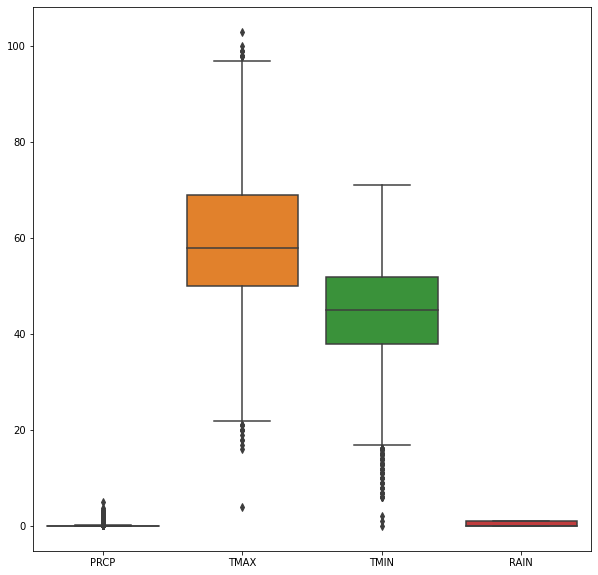

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

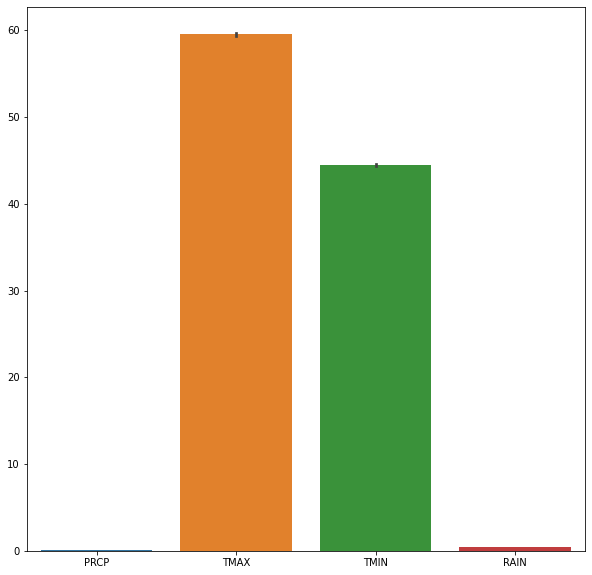

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


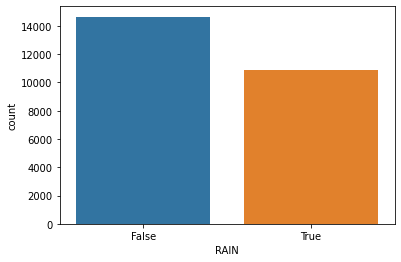

In [7]:
sns.countplot(df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


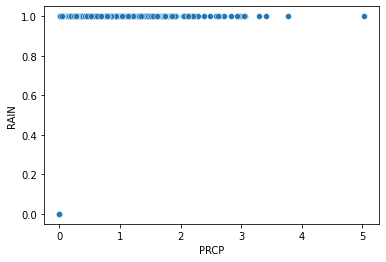

In [9]:
sns.scatterplot(df['PRCP'], df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


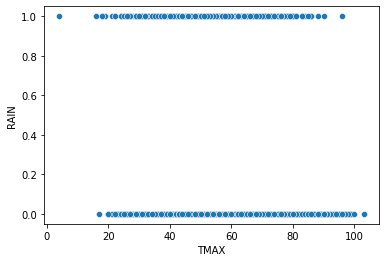

In [10]:
sns.scatterplot(df['TMAX'], df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


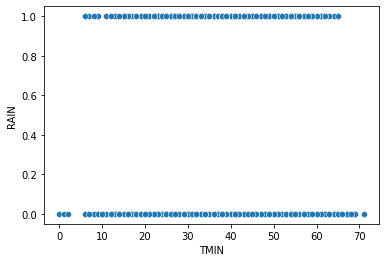

In [11]:
sns.scatterplot(df['TMIN'], df['RAIN'])

Build a loop to add your heuristic model guesses as a column to this dataframe

### **if it rained yesterday but not today, it will rain tomorrow.**

In [12]:
# here is an example loop that populates the dataframe created earlier
# with the total percip from yesterday and today
# then the guess is set to true if it rained yesterday but not today 

for z in range(numrows):
    #start at time 2 in the data frame
    i = z + 2
    #pull values from the dataframe
    yesterday = df.iloc[(i-2),1]
    today = df.iloc[(i-1),1]
    tomorrow = df.iloc[i,1]
    rain_tomorrow = df.iloc[(i),1]
    
    heuristic_df.iat[z,0] = yesterday
    heuristic_df.iat[z,1] = today
    heuristic_df.iat[z,2] = tomorrow
    heuristic_df.iat[z,3] = False # set guess default to False
    heuristic_df.iat[z,4] = rain_tomorrow
    
# if it rained yesterday but not  today, then it will rain tomorrow
    if (today == 0.0) and (yesterday > 0.0 ):
        heuristic_df.iat[z,2] = True

    if heuristic_df.iat[z,3] == heuristic_df.iat[z,4]:
        heuristic_df.iat[z,5] = True
    else:
        heuristic_df.iat[z,5] = False

### Preparing the Seattle weather data

In [13]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [14]:
def isNull(df, column):
  return df[pd.isnull(df[column])]

In [15]:
isNull(df, 'PRCP')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [16]:
isNull(df, 'RAIN')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [17]:
#df['PRCP'] = df['PRCP'].fillna(df['PRCP'].median)
#isNull(df, 'PRCP')

In [18]:
#df['RAIN'] = df['RAIN'].fillna(False)
#isNull(df, 'RAIN')

In [19]:
df = df.dropna()

# Regression

---
### 1. Break the dataset into two parts, training and testing.


In [29]:
X = df.loc[:, ['PRCP', 'TMAX', 'TMIN']].values
y = df['RAIN'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Scaling

In [30]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

In [31]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, reg.predict(X_train))*100)))

Training Accuracy: 93.0%


In [32]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train_scaled,y_train)
print("Training Accuracy with Scaled data: {}%".format(round(accuracy_score(y_train, reg.predict(X_train_scaled))*100)))

Training Accuracy with Scaled data: 97.0%


---
### 3. Evaluate both sets of data using your function.

In [33]:
import numpy as np
def SSE(y_test, y_pred):
  difference = y_test - y_pred
  squared_errors = difference ** 2
  return np.sum(squared_errors)

In [34]:
def evaluation(model, X_test, y_test):
  print("Accuracy: {}%".format(round(accuracy_score(y_test, model.predict(X_test))*100)))
  print("Precision: {}%".format(round(precision_score(y_test, model.predict(X_test))*100)))
  print("Recall: {}%".format(round(recall_score(y_test, model.predict(X_test))*100)))
  print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))
  sse = SSE(y_pred=model.predict(X_test), y_test=y_test.astype('int'))
  print("SSE: {}".format(sse))

In [47]:
# data
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(reg, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(reg, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(reg, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(reg, X_test_scaled, y_test)
print('*'*30)

******************************
Training Performance
******************************
Accuracy: 64.0%
Precision: 100.0%
Recall: 16.0%
MSE: 0.36128779724043447
SSE: 7384
***************
Scaled Data
Accuracy: 97.0%
Precision: 100.0%
Recall: 92.0%
MSE: 0.03395635580780898
SSE: 694
******************************


******************************
Testing Performance
******************************
Accuracy: 65.0%
Precision: 100.0%
Recall: 16.0%
MSE: 0.35401174168297456
SSE: 1809
***************
Scaled Data
Accuracy: 97.0%
Precision: 100.0%
Recall: 92.0%
MSE: 0.03444227005870842
SSE: 176
******************************


### Extra: Confusion Matrix

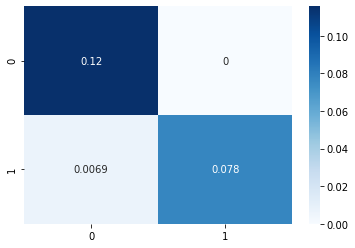

In [37]:
sns.heatmap(confusion_matrix(y_test, reg.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

---
### 4. What difference do you see in the calculated values (Precision and Recall)?
**Answer**

According to sikit learn doc., high precision relates to a low false positive rate, and low recall relates to a high false negative rate. Here, our Precision rate is higher than Recall which means the ability of the model to identify all relevant instances lower than his ability to return only relevant instances. However, after scaling the data the recall is perform better now compared to before.



# Classification

---
### 1. Break the dataset into two parts, training and testing.


In [38]:
X = df.loc[:, ['PRCP', 'TMAX', 'TMIN']].values
y = df['RAIN'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

In [39]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, rf.predict(X_train))*100)))

Training Accuracy: 100.0%


In [40]:
# Scaled data
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
print("Training Accuracy with scaled data: {}%".format(round(accuracy_score(y_train, rf.predict(X_train_scaled))*100)))

Training Accuracy with scaled data: 100.0%


---
### 3. Evaluate both sets of data using your function.

In [48]:
# data
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(rf, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(rf, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(rf, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(rf, X_test_scaled, y_test)
print('*'*30)

******************************
Training Performance
******************************
Accuracy: 43.0%
Precision: 43.0%
Recall: 100.0%
MSE: 0.5722184166748214
SSE: 11695
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


******************************
Testing Performance
******************************
Accuracy: 42.0%
Precision: 42.0%
Recall: 100.0%
MSE: 0.5778864970645793
SSE: 2953
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


The classification model does not seem stable model or maybe the test data points are duplicate. I'm not sure about the reason but it was worth trying it

### Extra: Confusion Matrix

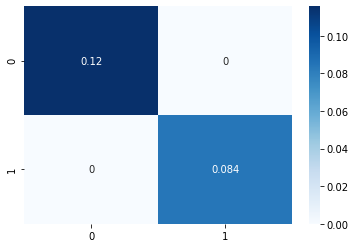

In [44]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)